# EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
df = pd.read_csv('../full-data/preprocessed.csv')

Построим boxplot для всех числовых признаков, чтобы посмотреть на распределение данных (на travel_distance посмотрим потом, так там большинство нулей).

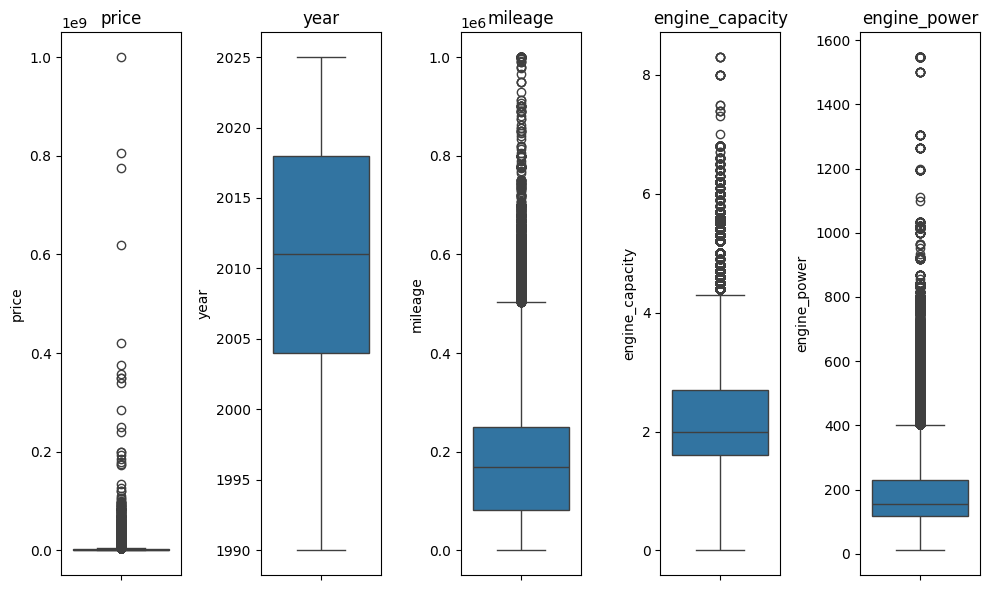

In [9]:
plt.figure(figsize=(10, 6))

cols = ['price', 'year', 'mileage', 'engine_capacity', 'engine_power']

for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

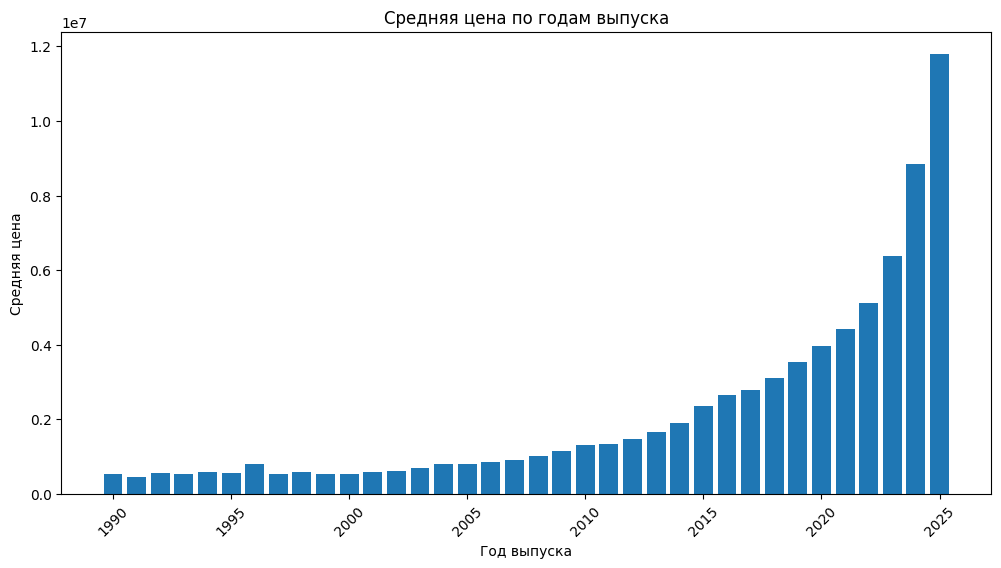

In [10]:
year_price = df.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(year_price['year'], year_price['price'])
plt.title('Средняя цена по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.show()

Получаем совершенно ожидаемое распределение цены в зависимости от года выпуска. Так, как в наших данных учитывается динамика рынка за долгий период, вероятность переобучения и неточных прогнозов в будущем из-за этого мала&

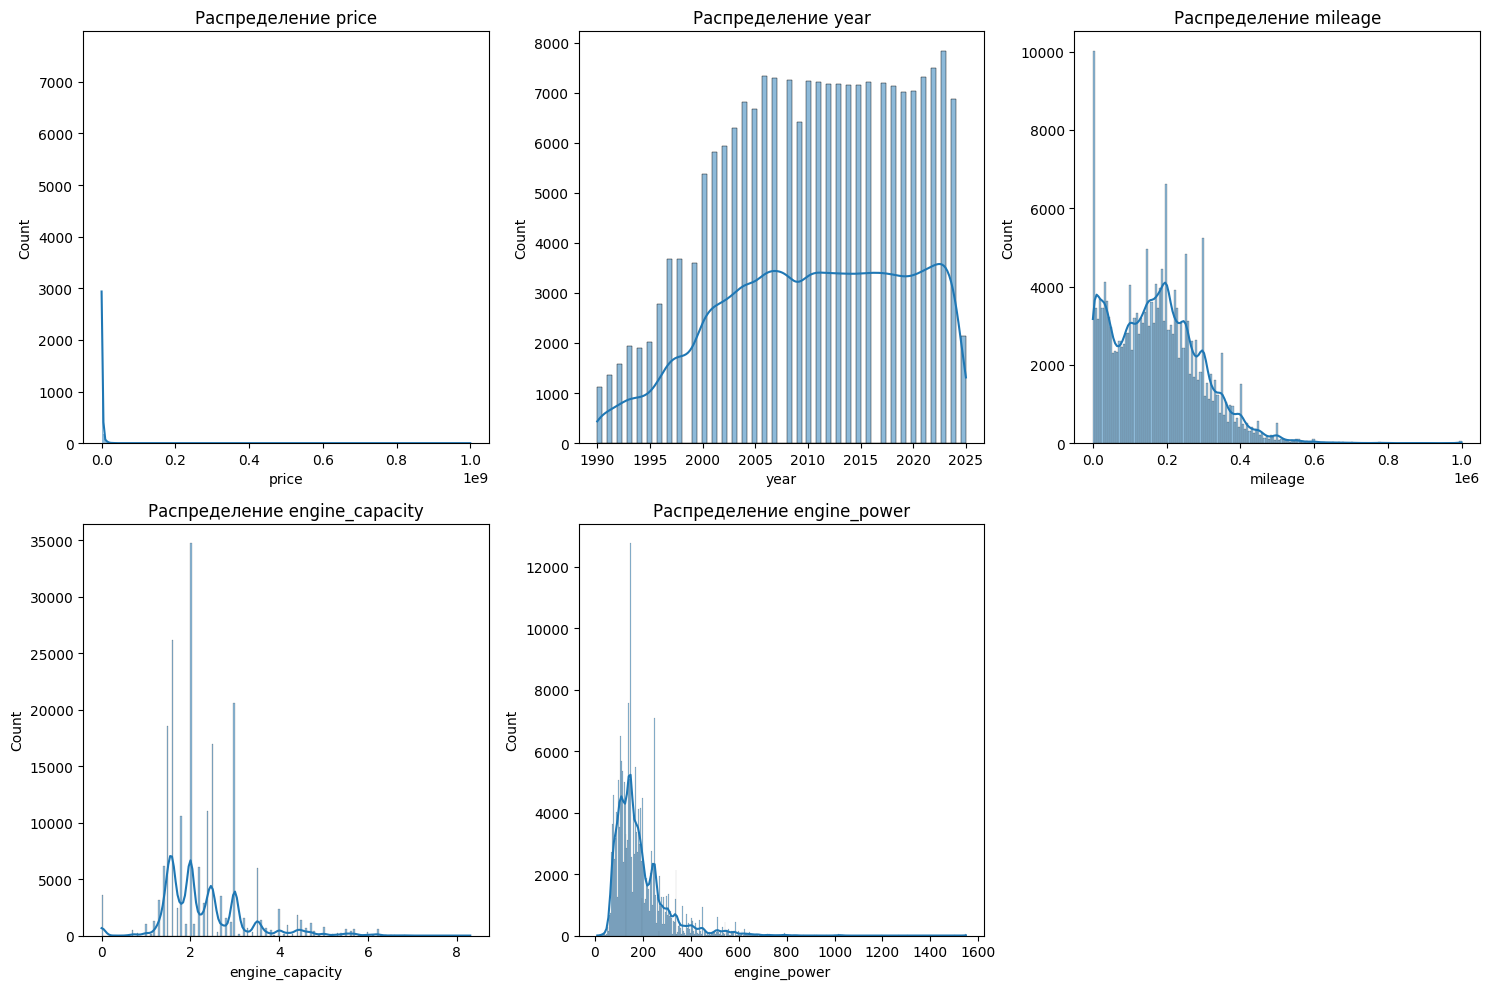

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

### Посмотрим на распределение числовых признаков в наших данных:
- `price` - подкрепляя данными boxplot выше мы можем заметить, что большинство моделей сконцентрированы в относительно невысоком ценовом диапазоне. Ассиметрия может помешать моделям, в этом случае мы можем прменить преобразование.
- `year` - относительно равномерное с 2020 по 2024 года.
- `mileage` - большинство автомобилей имеет относительно небольшой пробег, а небольшое число — экстремально большой (правостороняя асимметрия). Возможно нужно будет выполнить преобразование.
- `engine_capacity` - распределение также сдвинуто вправо, но в целом меньше «радикальных» выбросов, чем у цены или пробега.
- `engine_power` - аналогично, правосторонняя асимметрия.

## Проанализируем влияение цвета на целевую переменную

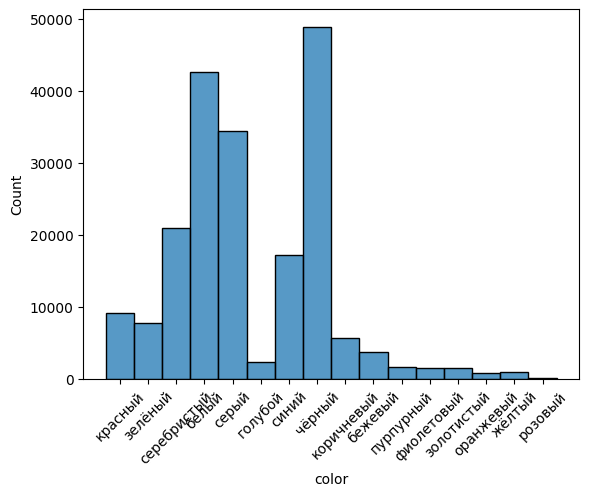

In [12]:
sns.histplot(data=df, x='color')
plt.xticks(rotation=45)
plt.show()

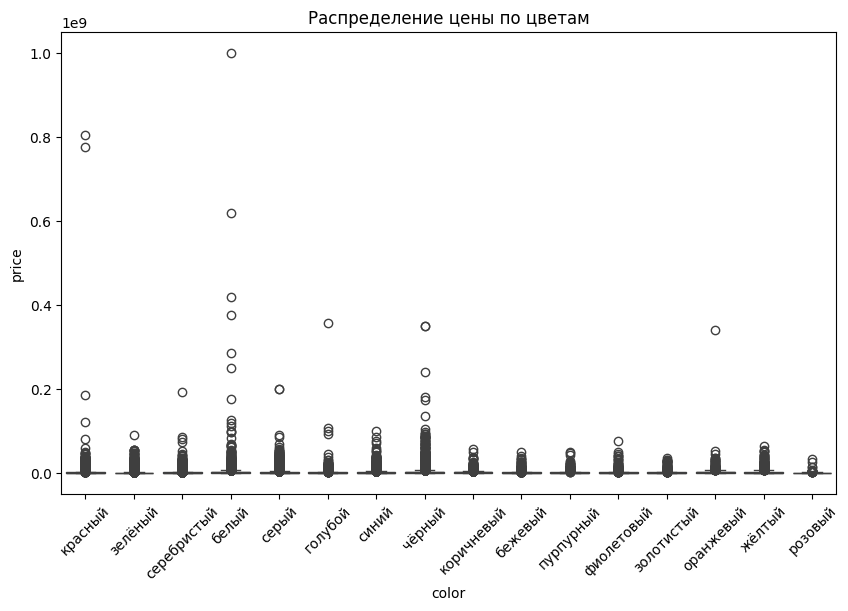

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=df)
plt.title('Распределение цены по цветам')
plt.xticks(rotation=45)
plt.show()

In [14]:
pivot_color = df.pivot_table(
    index='color',
    values='price',
    aggfunc='mean'
)
pivot_color

,price
color,
бежевый,1.364856e+06
белый,2.625883e+06
голубой,2.001075e+06
жёлтый,3.765430e+06
зелёный,1.499662e+06
золотистый,1.542346e+06
коричневый,1.967053e+06
красный,1.813292e+06
оранжевый,3.352920e+06


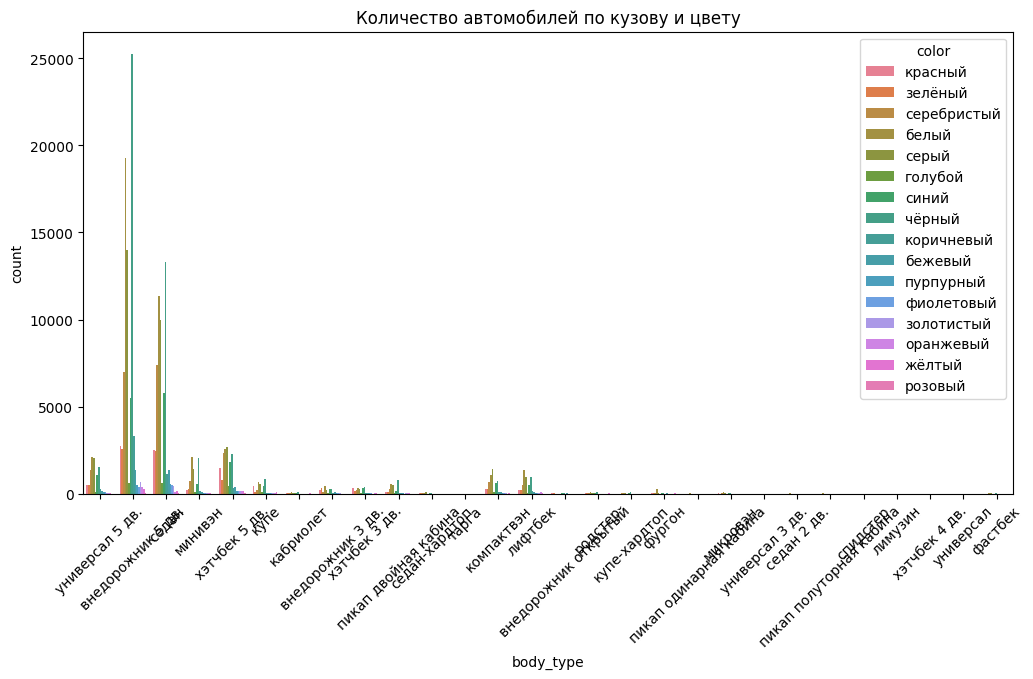

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='body_type', hue='color', data=df)
plt.title('Количество автомобилей по кузову и цвету')
plt.xticks(rotation=45)
plt.show()

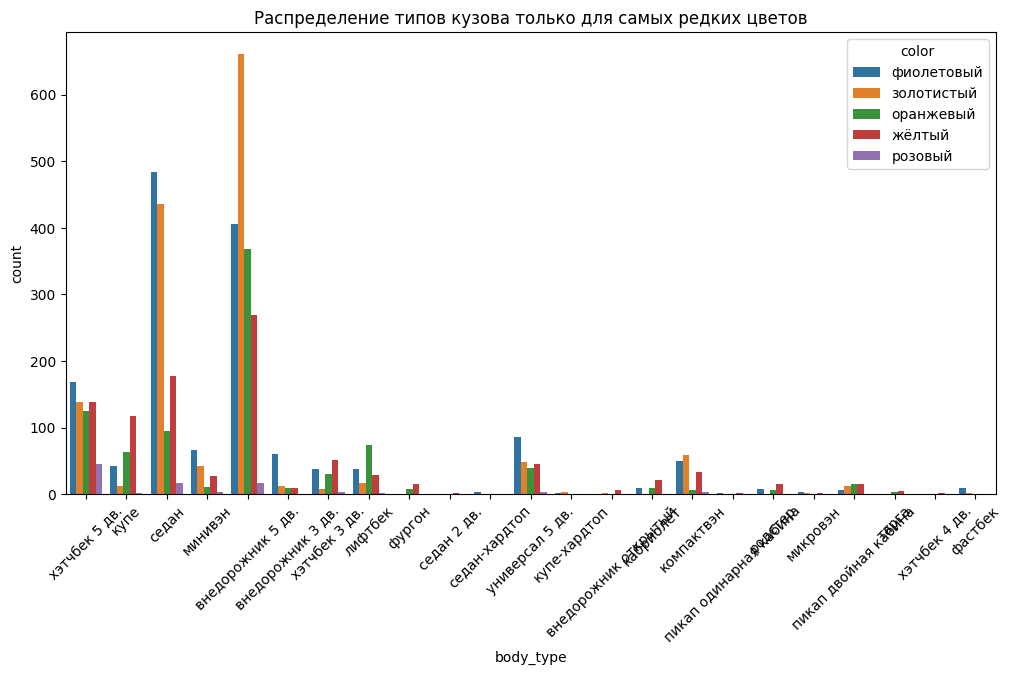

In [ ]:
n_rare = 5

color_counts = df['color'].value_counts(ascending=True)
rare_colors = color_counts.index[:n_rare]

df_rare = df[df['color'].isin(rare_colors)]

plt.figure(figsize=(12, 6))
sns.countplot(x='body_type', hue='color', data=df_rare)
plt.title('Распределение типов кузова только для самых редких цветов')
plt.xticks(rotation=45)
plt.show()

In [16]:
ct = pd.crosstab(df['body_type'], df['color'])

ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100
ct_percent = ct_percent.round(2)

threshold = 0

print(ct_percent.where(ct_percent >= threshold))

color                    бежевый  белый  голубой  жёлтый  зелёный  золотистый  \
body_type                                                                       
внедорожник 3 дв.           3.71  21.81     0.91    0.48    14.59        0.58   
внедорожник 5 дв.           1.65  22.95     0.76    0.32     3.04        0.79   
внедорожник открытый        9.35   6.47     6.47    5.04    33.09        1.44   
кабриолет                   0.78  19.96     3.13    4.11     4.11        0.20   
компактвэн                  1.41  19.10     2.21    0.60     4.39        1.08   
купе                        0.36  18.10     2.25    3.24     3.41        0.36   
купе-хардтоп                0.85  19.66     1.71    0.43     2.14        1.28   
лимузин                     0.00  50.00     0.00    0.00     0.00        0.00   
лифтбек                     1.60  26.41     0.93    0.56     4.60        0.33   
микровэн                    2.65  30.68     1.89    0.76     3.03        0.76   
минивэн                     

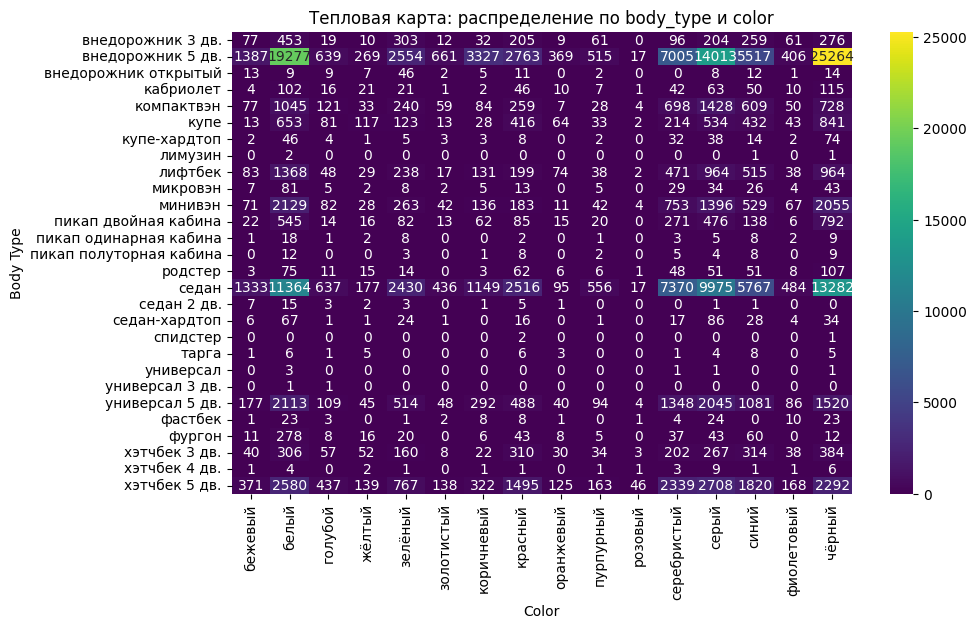

In [17]:
ct = pd.crosstab(df['body_type'], df['color'])

plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='viridis')
plt.title('Тепловая карта: распределение по body_type и color')
plt.xlabel('Color')
plt.ylabel('Body Type')
plt.show()

Посмотрим, есть ли выбросы в данных среди числовых и категориальных переменных.

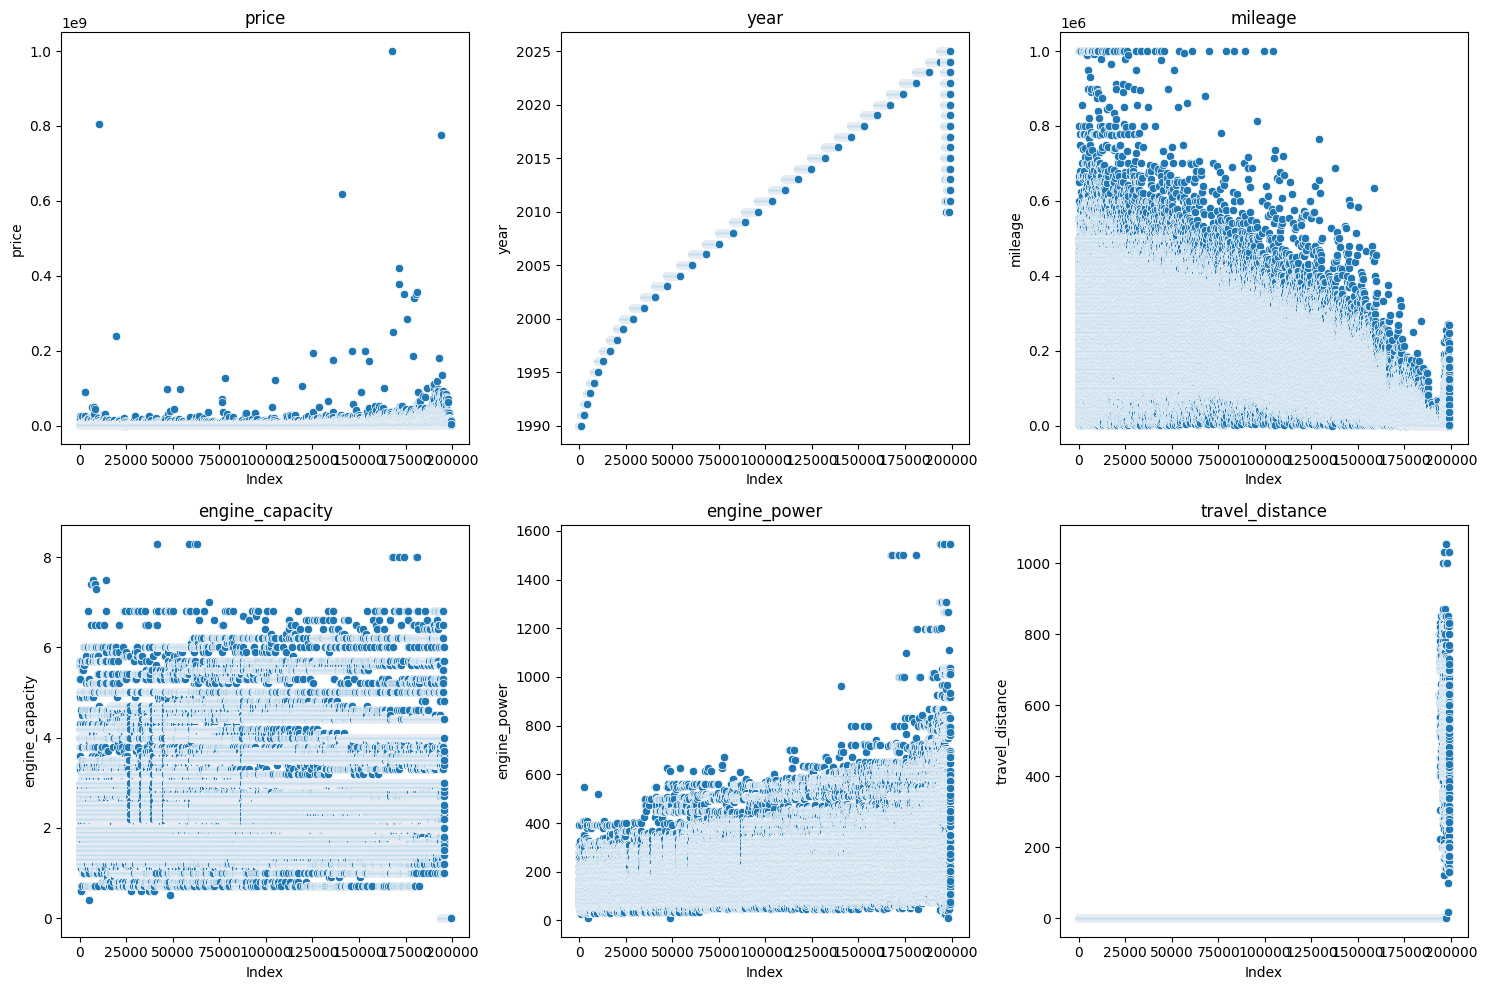

In [18]:
numeric_columns = ['price', 'year', 'mileage', 'engine_capacity', 'engine_power', 'travel_distance']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df.index, y=df[column])
    plt.title(column)
    plt.xlabel('Index')

plt.tight_layout()
plt.show()

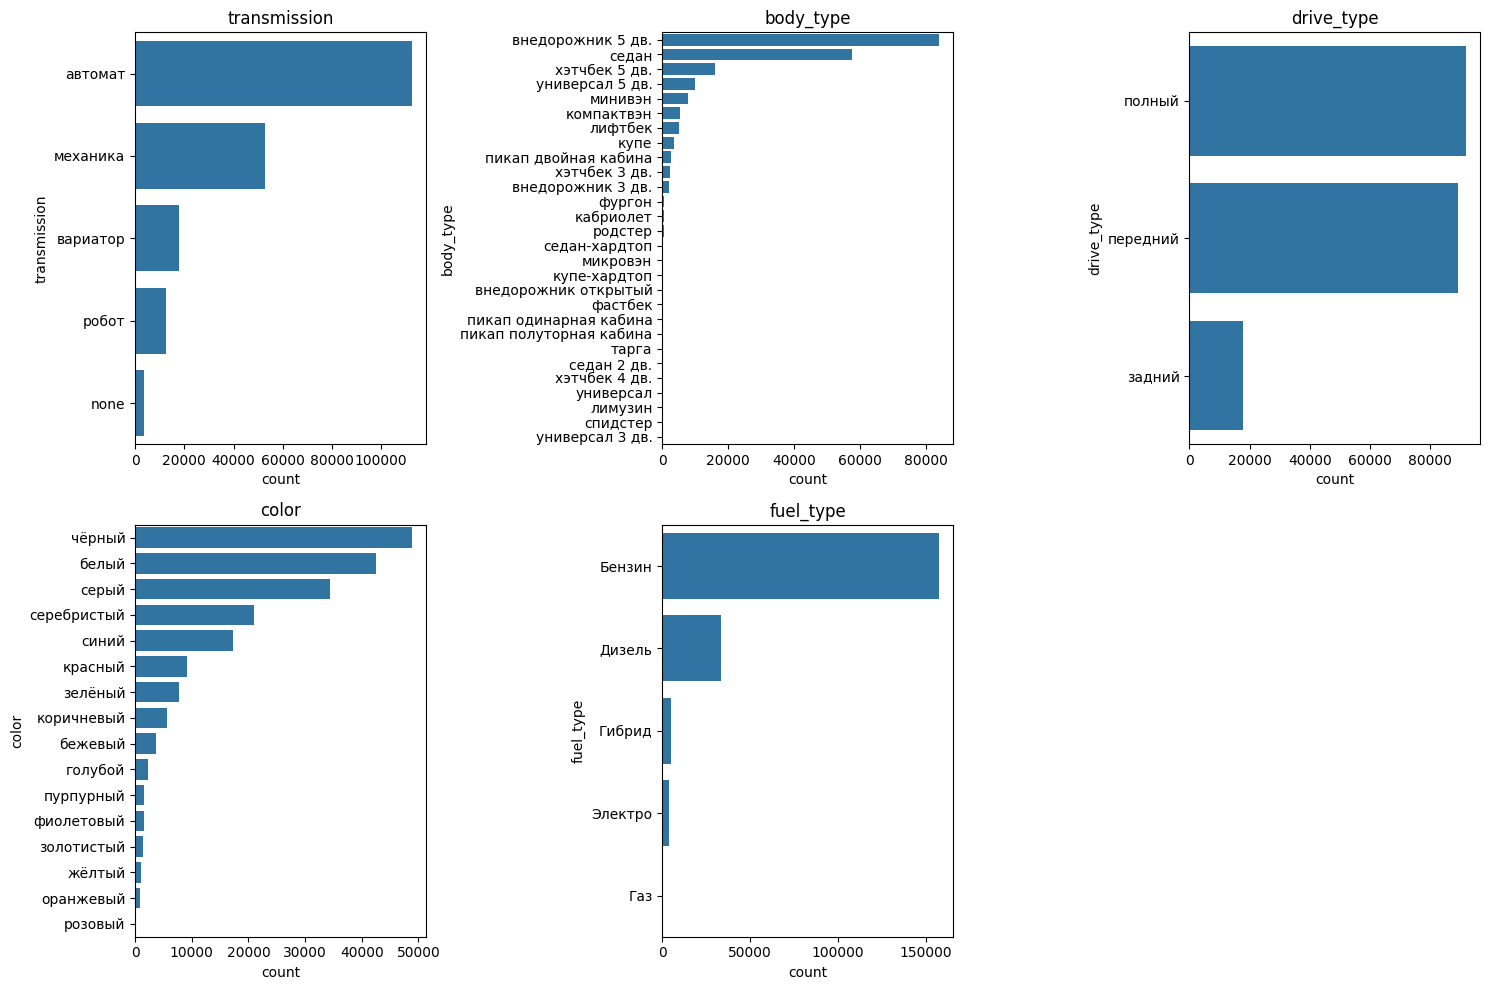

In [19]:
categorical_columns = ['transmission', 'body_type', 'drive_type', 'color', 'fuel_type']


plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(column)

plt.tight_layout()
plt.show()

Видим, что подавляющее большинство авто с бензином, а также видны выбросы в данных. Так как данные имеют нормальное распределение, то используем метод Z-оценки для удаления выбросов.

In [20]:
from scipy.stats import zscore


def remove_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[abs(z_scores) < threshold]


numeric_columns = ['price', 'year', 'mileage', 'engine_capacity', 'engine_power', 'travel_distance']
for column in numeric_columns:
    df = remove_outliers_zscore(df, column)


print(df.shape)


(187694, 13)


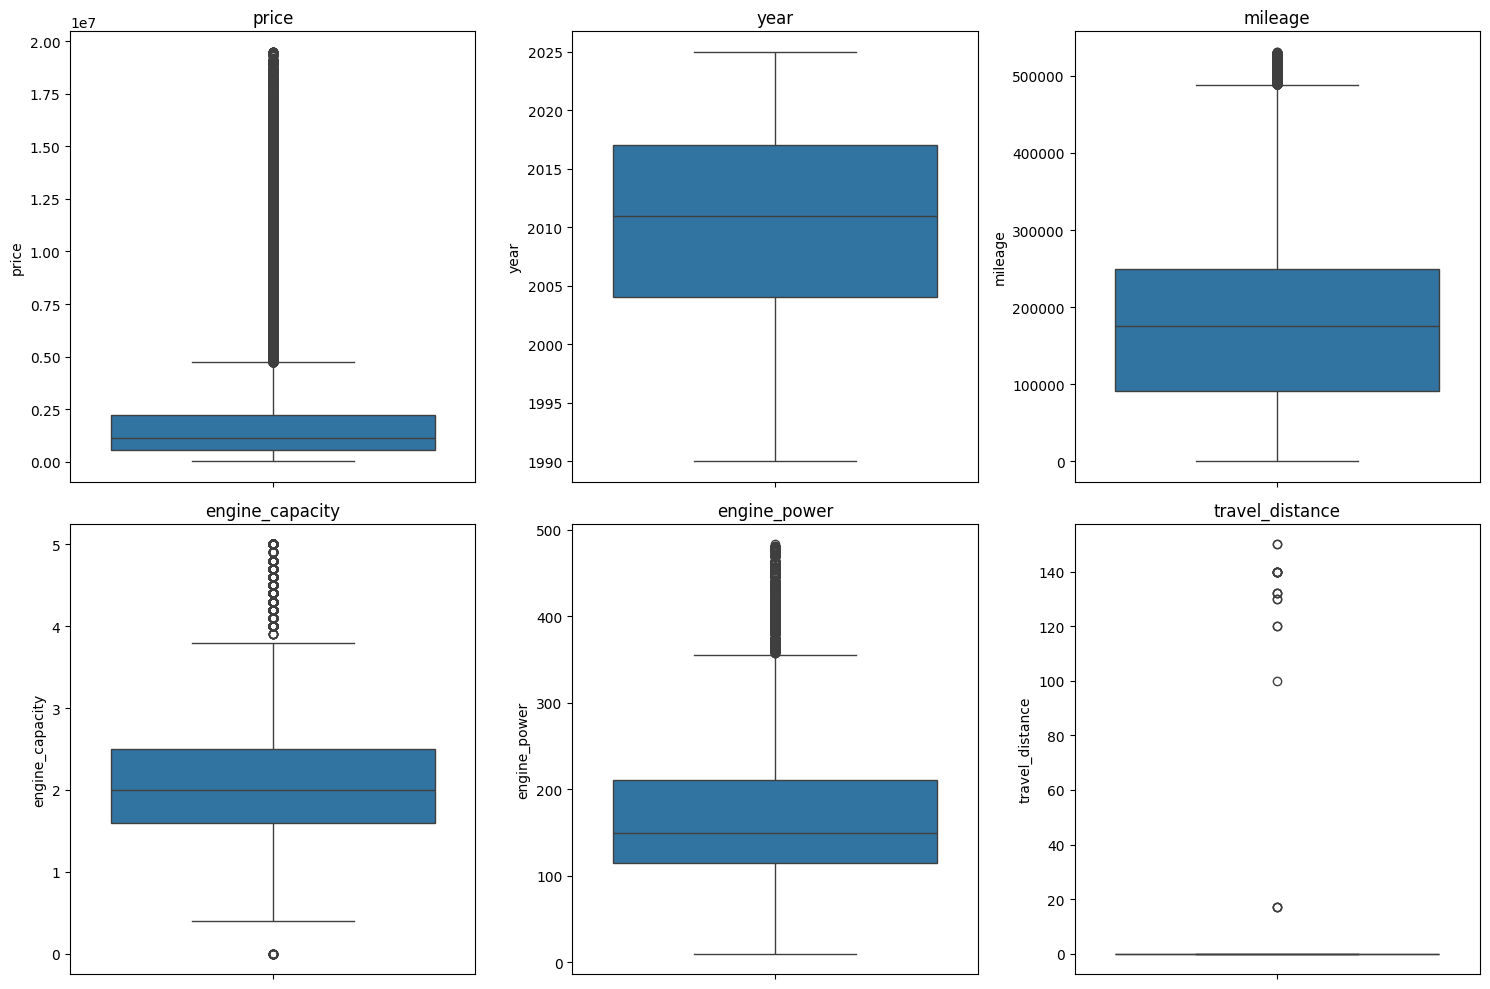

In [21]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Посмотрим на матрицу корреляций

Матрица корреляций:
                    price      year   mileage  engine_capacity  engine_power  \
price            1.000000  0.596383 -0.492309         0.389585      0.684465   
year             0.596383  1.000000 -0.680341         0.057562      0.419292   
mileage         -0.492309 -0.680341  1.000000         0.066790     -0.241994   
engine_capacity  0.389585  0.057562  0.066790         1.000000      0.725159   
engine_power     0.684465  0.419292 -0.241994         0.725159      1.000000   
travel_distance -0.003452  0.006020 -0.009828        -0.028719     -0.009420   

                 travel_distance  
price                  -0.003452  
year                    0.006020  
mileage                -0.009828  
engine_capacity        -0.028719  
engine_power           -0.009420  
travel_distance         1.000000  


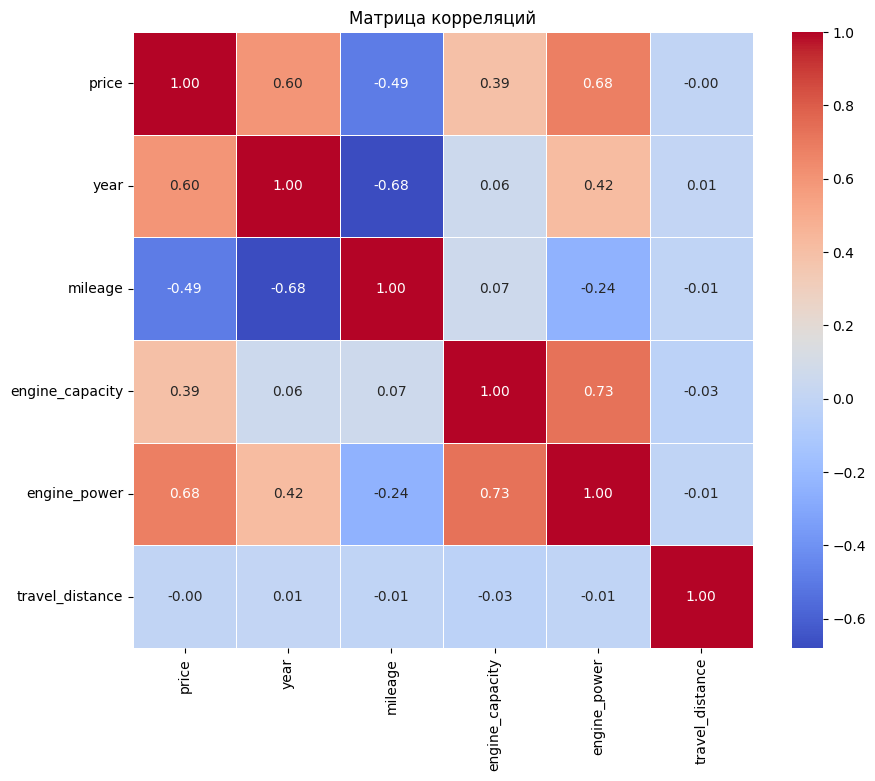

In [22]:
numeric_df = df[numeric_columns]

correlation_matrix = numeric_df.corr()


print("Матрица корреляций:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляций")
plt.show()

Видим, что travel_distance не влияет на цену, поскольку корреляция почти равна 0

Средняя стоимость автомобилей в зависимости от типа топлива:
  fuel_type         price
0    Бензин  1.543280e+06
1       Газ  1.400780e+06
2    Гибрид  4.240002e+06
3    Дизель  3.035709e+06
4   Электро  2.291950e+06


/var/folders/8t/ljy40y7s6_q7mblbcyxxb2ch0000gn/T/ipykernel_84983/873857316.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel_type', y='price', data=fuel_price, palette='viridis')


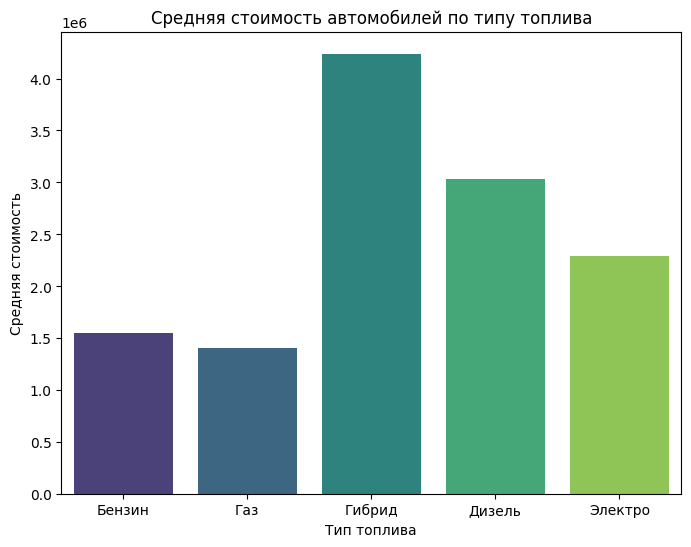

/var/folders/8t/ljy40y7s6_q7mblbcyxxb2ch0000gn/T/ipykernel_84983/873857316.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='price', data=df, palette='viridis')


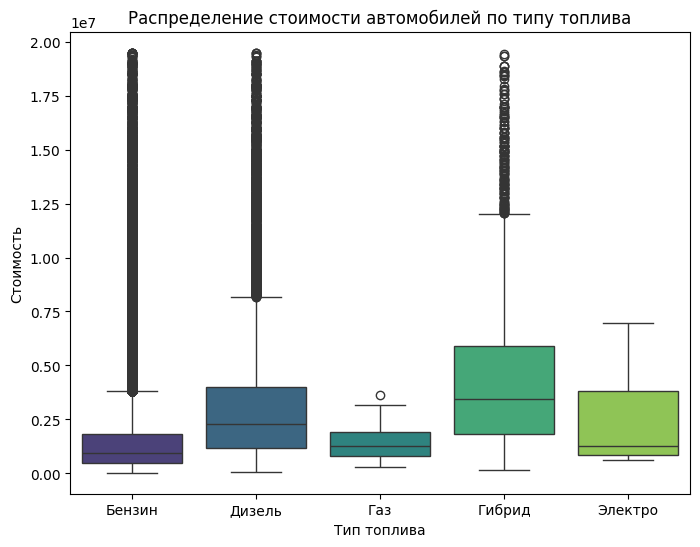

In [23]:
fuel_price = df.groupby('fuel_type')['price'].mean().reset_index()

print("Средняя стоимость автомобилей в зависимости от типа топлива:")
print(fuel_price)

plt.figure(figsize=(8, 6))
sns.barplot(x='fuel_type', y='price', data=fuel_price, palette='viridis')
plt.title('Средняя стоимость автомобилей по типу топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Средняя стоимость')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel_type', y='price', data=df, palette='viridis')
plt.title('Распределение стоимости автомобилей по типу топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Стоимость')
plt.show()

In [24]:
fuel_stats = df.groupby('fuel_type')['price'].agg(['mean', 'median', 'min', 'max']).reset_index()

print("Статистика стоимости автомобилей по типу топлива:")
print(fuel_stats)

Статистика стоимости автомобилей по типу топлива:
  fuel_type          mean     median     min       max
0    Бензин  1.543280e+06   950000.0   25000  19500000
1       Газ  1.400780e+06  1249000.0  265000   3637953
2    Гибрид  4.240002e+06  3440000.0  165000  19438900
3    Дизель  3.035709e+06  2299000.0   45000  19500000
4   Электро  2.291950e+06  1269500.0  600000   6945000


In [25]:
from sklearn.preprocessing import StandardScaler


numeric_columns = ['price', 'year', 'mileage', 'engine_capacity', 'engine_power', 'travel_distance']
numeric_df = df[numeric_columns]


scaler = StandardScaler()


scaled_data = scaler.fit_transform(numeric_df)

scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

for column in numeric_columns:
    df[column + '_scaled'] = scaled_df[column]

print(df.head())

   Unnamed: 0   price                   title  year  mileage transmission  \
0           3  189700    Volkswagen Passat B3  1990   325000     механика   
1           4  370000        Nissan Terrano I  1990   224000      автомат   
2           5  350000          Honda Civic IV  1990   200000     механика   
3           6  360000    Volkswagen Passat B3  1990   200000     механика   
4           7   99000  Toyota Carina V (T170)  1990   296000      автомат   

           body_type drive_type        color  engine_capacity  engine_power  \
0    универсал 5 дв.   передний      красный              1.8          90.0   
1  внедорожник 5 дв.     полный      зелёный              2.7         100.0   
2              седан   передний  серебристый              1.6         120.0   
3    универсал 5 дв.   передний        белый              1.8          90.0   
4              седан   передний  серебристый              1.5          94.0   

  fuel_type  travel_distance  price_scaled  year_scaled  milea

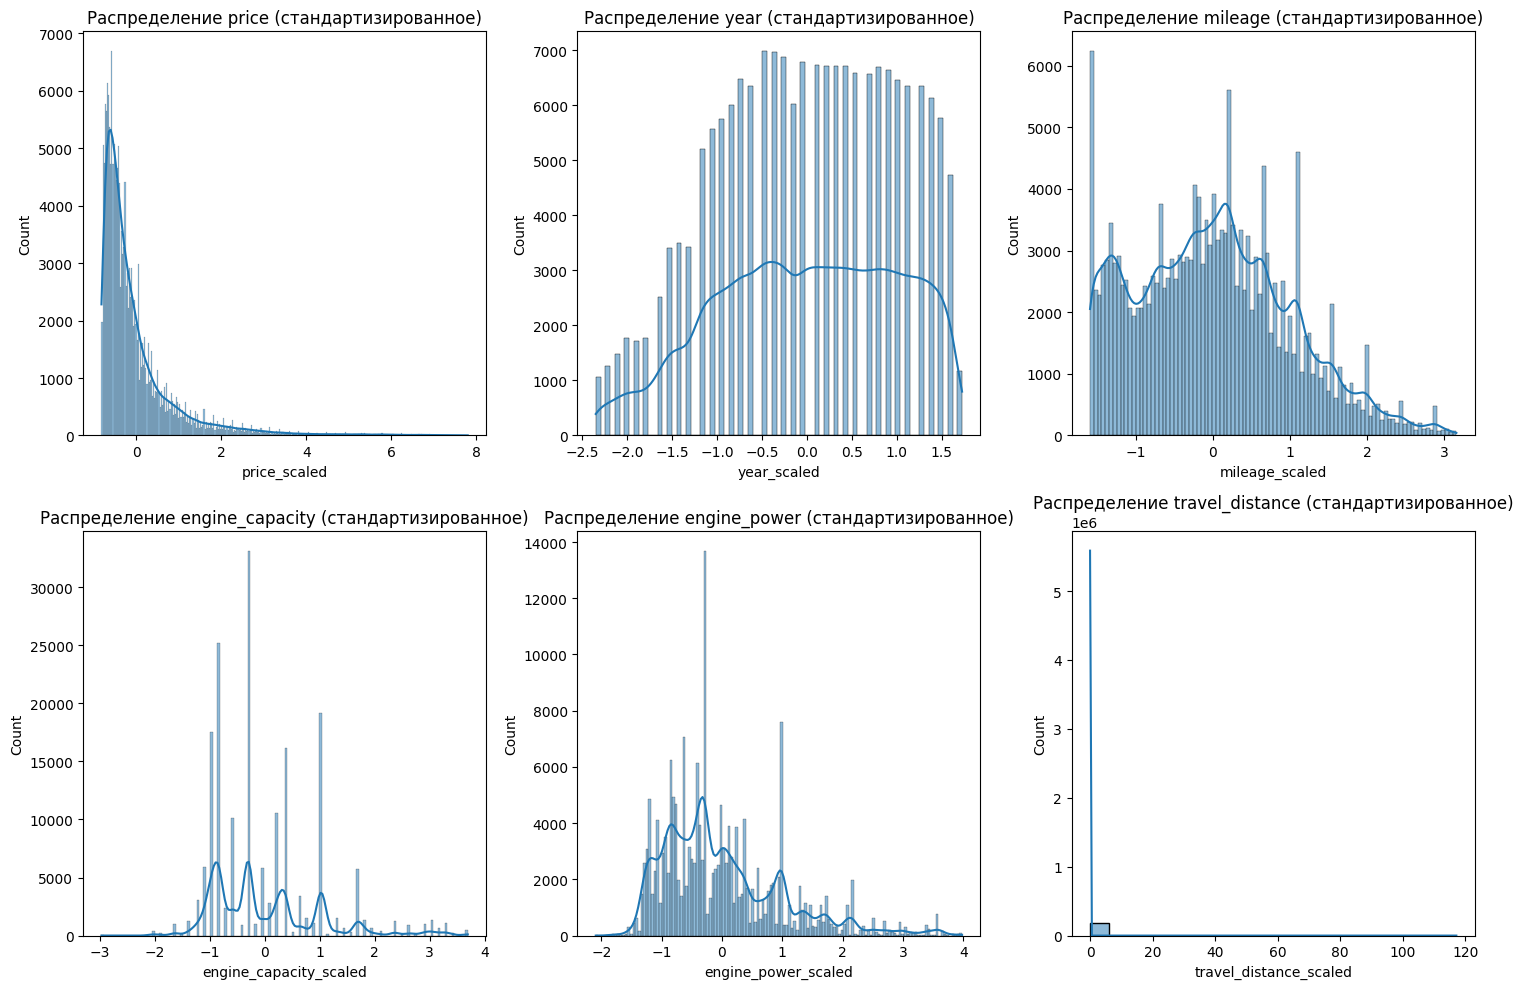

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column + '_scaled'], kde=True)
    plt.title(f'Распределение {column} (стандартизированное)')

plt.tight_layout()
plt.show()

Мы изменяли данные в процессе исследования, переписываем файл данными, с которыми будем работать в дальнейшем.

In [30]:
df.to_csv('../full-data/full_processed.csv')